In [1]:
import numpy as np
import os
import dill
script_dir = os.getcwd()


from sde.SDE_ARFF_lib import (
    SDEARFFTrain,
    NNHyperparameters
)

from sde.experiment_reports_owen import (
    PlotResults
)

%load_ext autoreload
%autoreload 2



2025-06-06 06:58:05.298092: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-06 06:58:05.303389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda-12.6/lib64::/usr/lib/x86_64-linux-gnu
2025-06-06 06:58:05.303404: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# note book parameters
ex_name = "ex3-1D_cubic"
data_name = f"{ex_name}_time1_SS1e-05_ntraj100"

random_seed = 1
step_size = 0.01


In [3]:
# load true functions
with open(f"true_functions/{ex_name}.pkl", "rb") as f:
    true_functions = dill.load(f)

true_drift = true_functions["drift"]
true_diffusion = true_functions["diffusion"]

# load data
training_data = np.load(f"training_data/{data_name}.npz")

n_dimensions = training_data["n_dimensions"]
trajectory_step_size = training_data["step_size"]
xlim = training_data["xlim"]
trajectories = training_data["trajectories"]

In [4]:
# network parameters
validation_split = .1
ARFF_validation_split = .1

drift_param = NNHyperparameters(K=2**7, 
                                M_min=10,
                                M_max=100,
                                lambda_reg=2e-3,
                                gamma=1,
                                delta=0.1,
                                name='drift')
diff_param = NNHyperparameters(K=drift_param.K,
                               M_min=drift_param.M_min,
                               M_max=drift_param.M_max,
                               lambda_reg=drift_param.lambda_reg,
                               gamma=drift_param.gamma,
                               delta=drift_param.delta,
                               name='diff')


step_size: 0.5
# data points: 200
drift epoch: 45


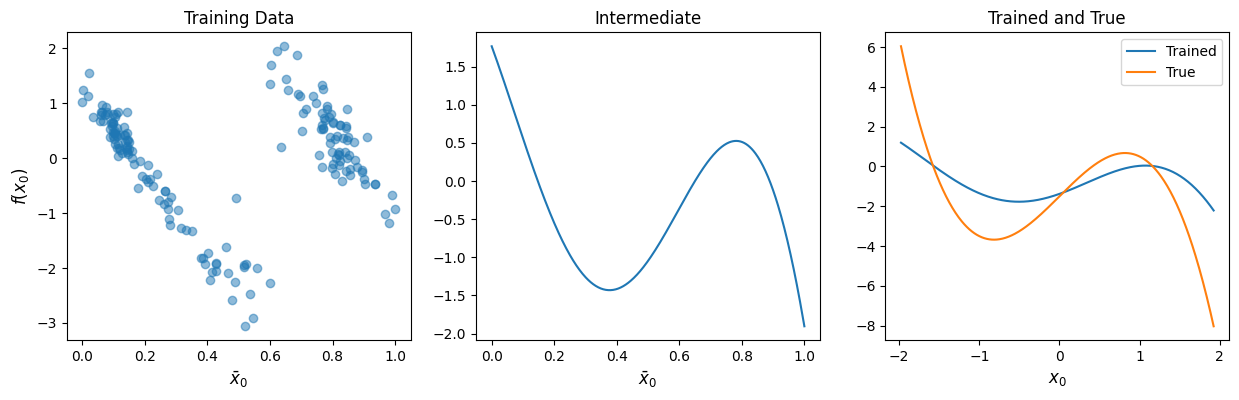

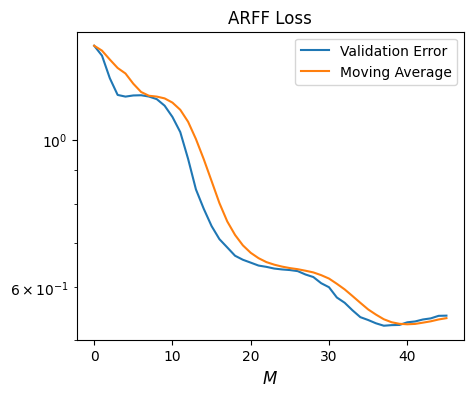

diff epoch: 99


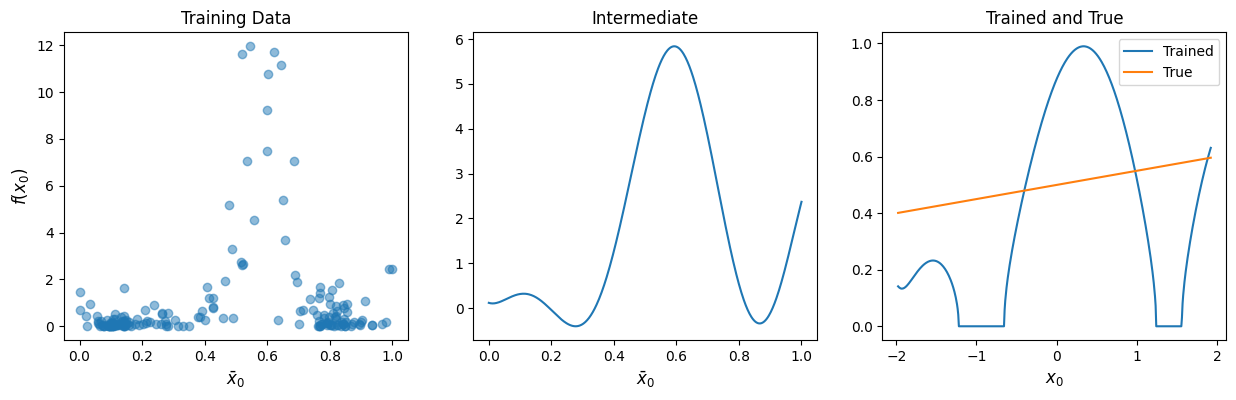

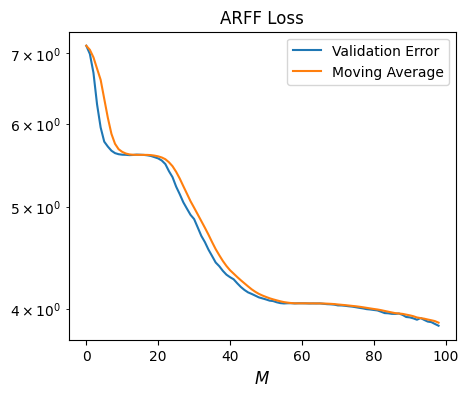

2025-06-06 06:58:13.161347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda-12.6/lib64::/usr/lib/x86_64-linux-gnu
2025-06-06 06:58:13.161453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda-12.6/lib64::/usr/lib/x86_64-linux-gnu
2025-06-06 06:58:13.161537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda-12.6/lib64::/usr/lib/x86_64-linux-gnu
2025-06-06 06:58:13.

Drift RMSE: 1.4835226783494921
Diffusion RMSE: 0.33249603504937203
Observed loss: 54501.743749878784
Observed validation loss: 88264.56801714402
True loss: 5.618127408946633
Training time: 3.0332601070404053
step_size: 0.1
# data points: 900
drift epoch: 98


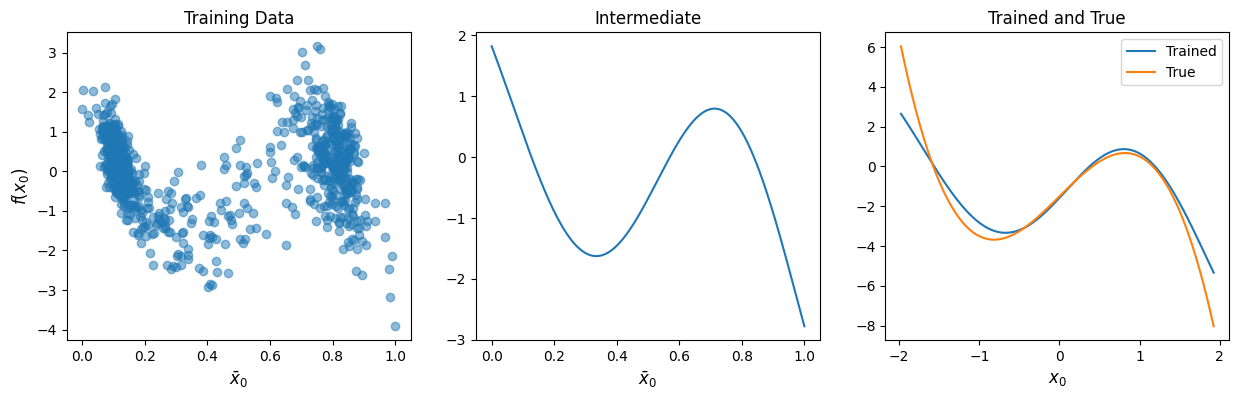

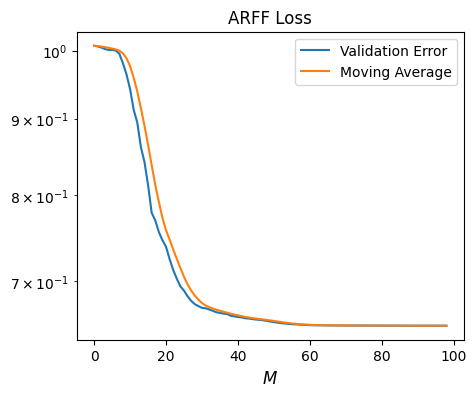

diff epoch: 99


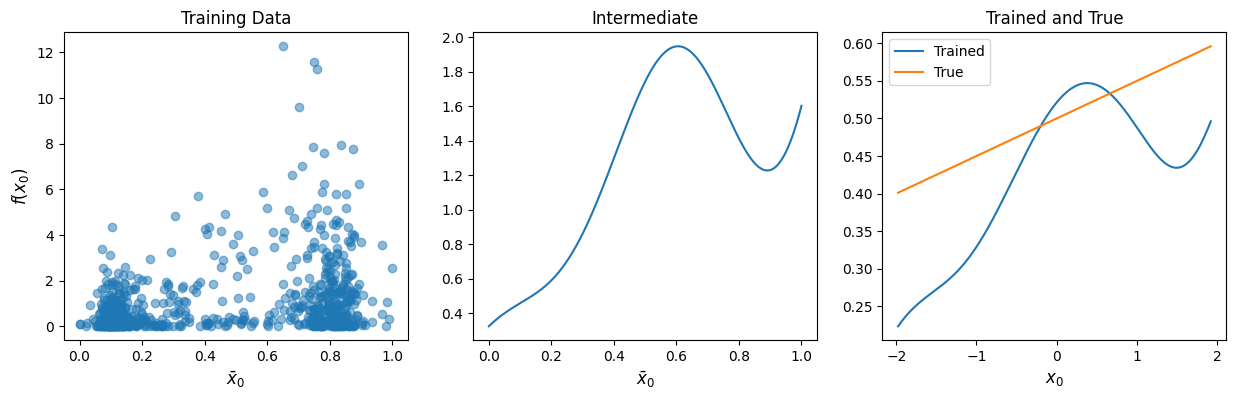

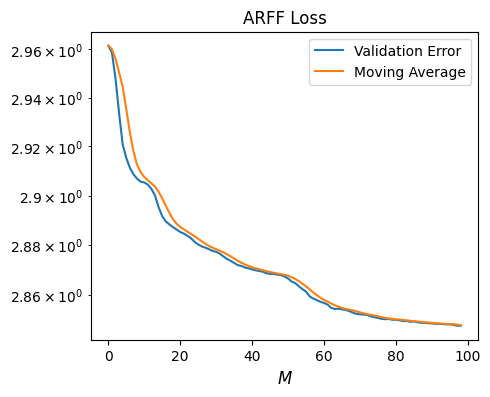

Drift RMSE: 0.4617184155748629
Diffusion RMSE: 0.12187428280543958
Observed loss: -0.7428748791018119
Observed validation loss: -0.7415335174960562
True loss: -0.5260865664330542
Training time: 7.801860809326172
step_size: 0.05
# data points: 1900
drift epoch: 49


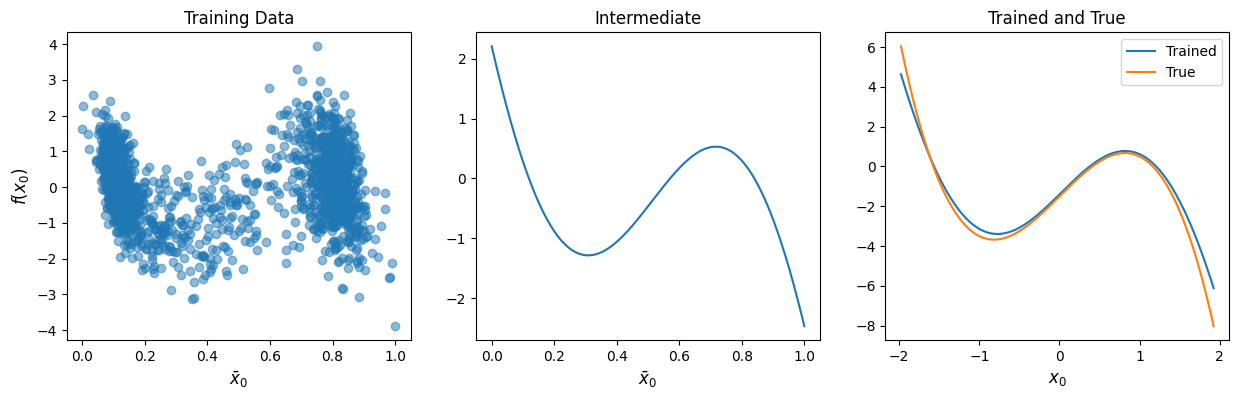

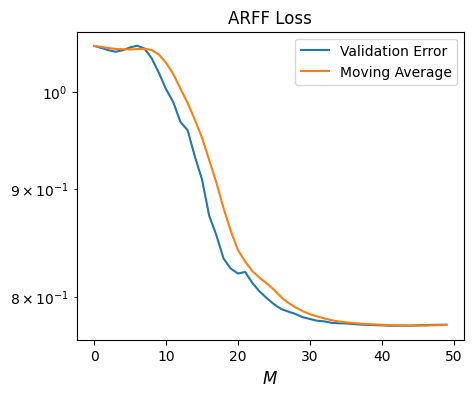

diff epoch: 99


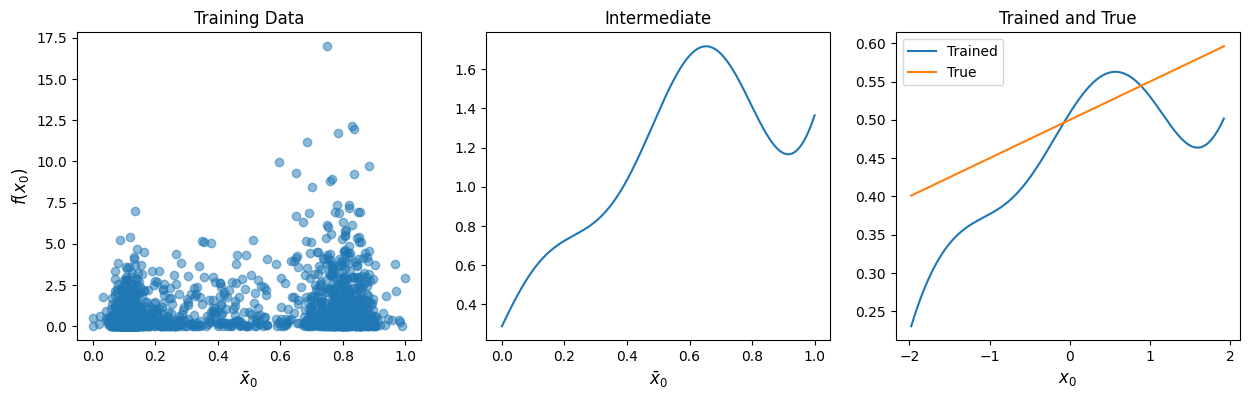

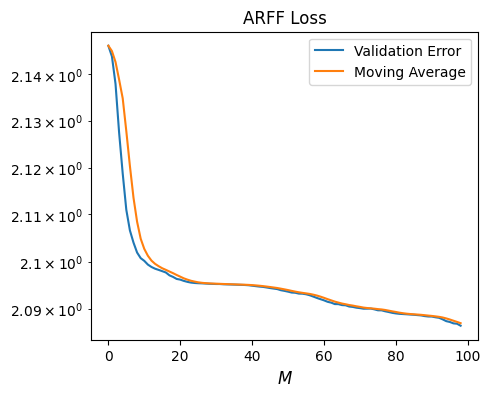

Drift RMSE: 0.2547556570072802
Diffusion RMSE: 0.07577798054344705
Observed loss: -0.9662445310872882
Observed validation loss: -0.92630632274243
True loss: -0.8992313989968258
Training time: 10.939777135848999
step_size: 0.01
# data points: 10000
drift epoch: 55


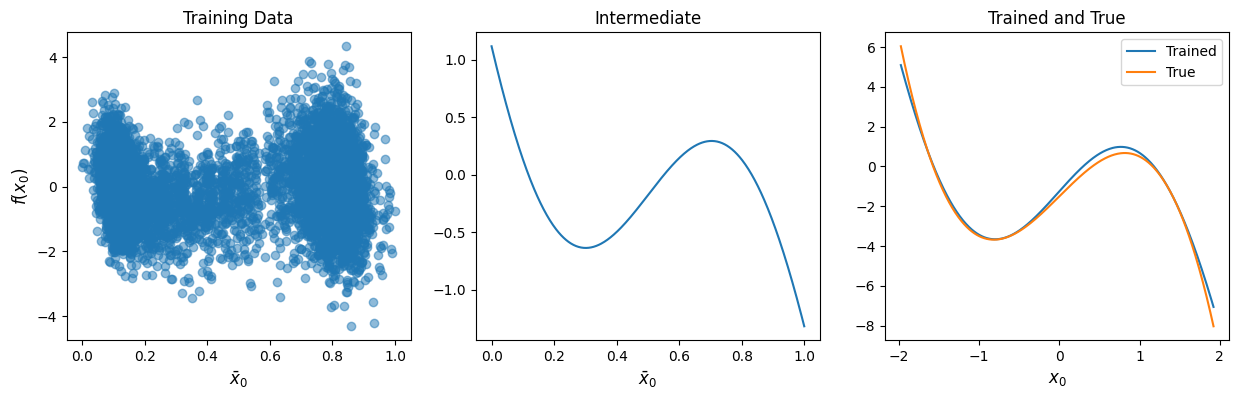

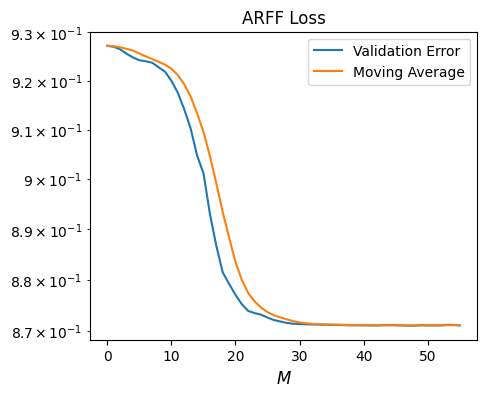

diff epoch: 30


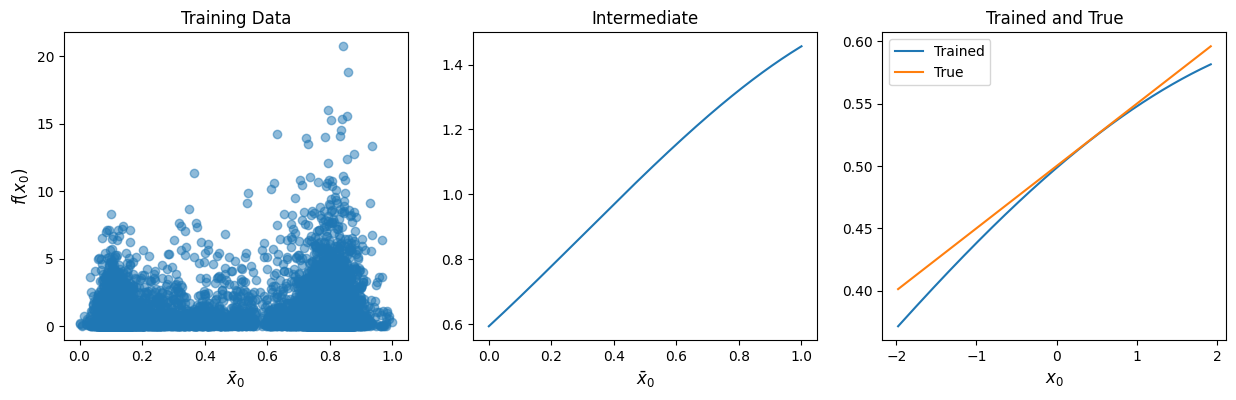

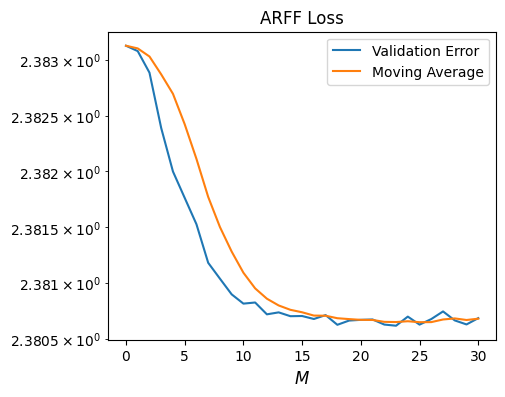

Drift RMSE: 0.14510740864958546
Diffusion RMSE: 0.014694651253546534
Observed loss: -1.6360228342218963
Observed validation loss: -1.6721248047252684
True loss: -1.6526447707963152
Training time: 21.73364281654358
step_size: 0.005
# data points: 20000
drift epoch: 57


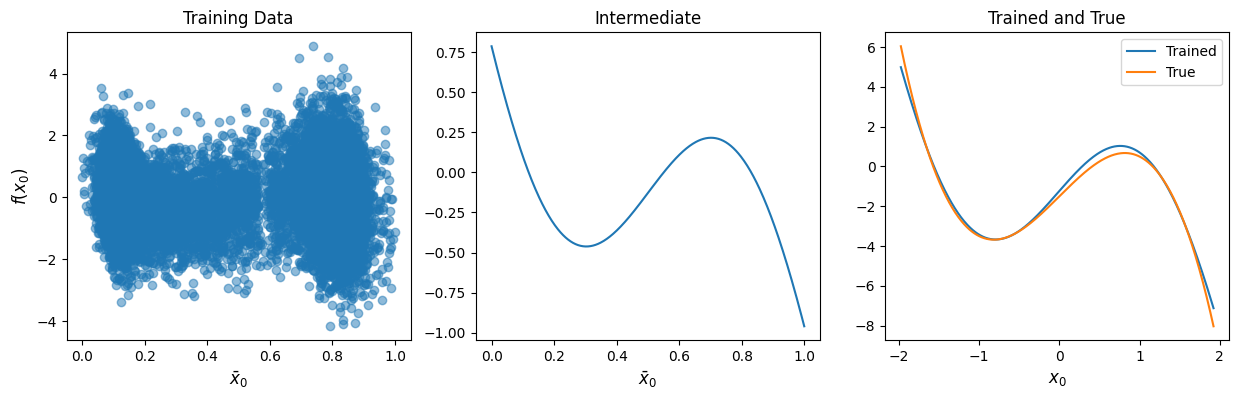

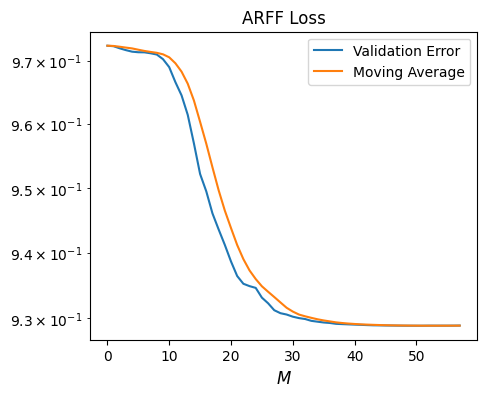

diff epoch: 10


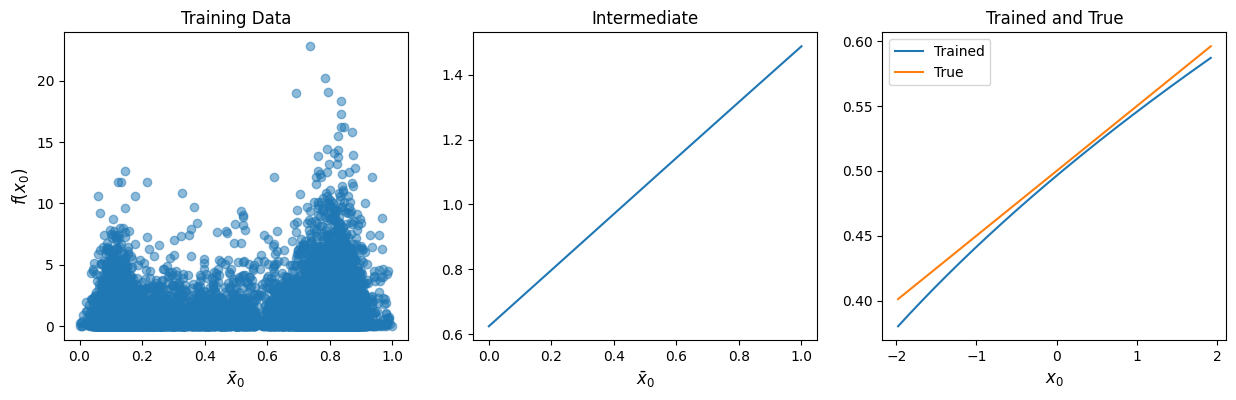

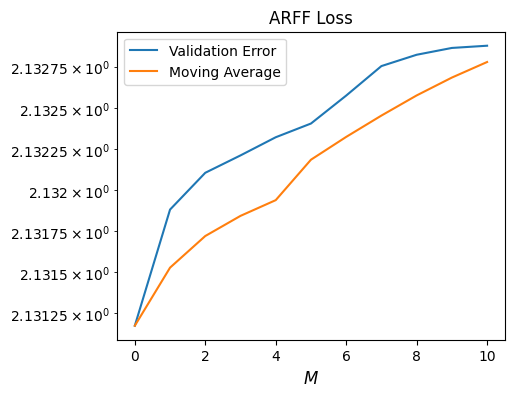

Drift RMSE: 0.1666012827787418
Diffusion RMSE: 0.010445593088796619
Observed loss: -1.9805332510671885
Observed validation loss: -1.9716037306006988
True loss: -1.9450259139558994
Training time: 20.582472324371338
step_size: 0.001
# data points: 99900
drift epoch: 42


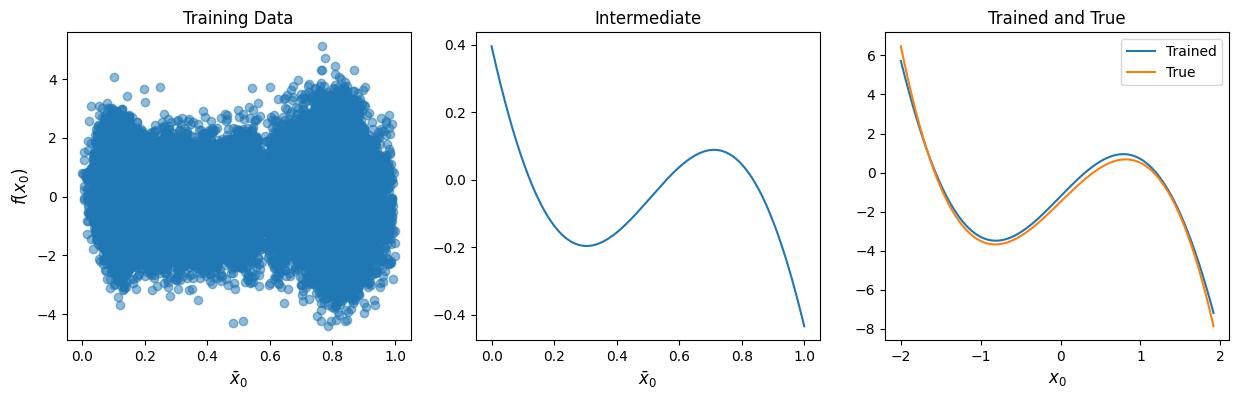

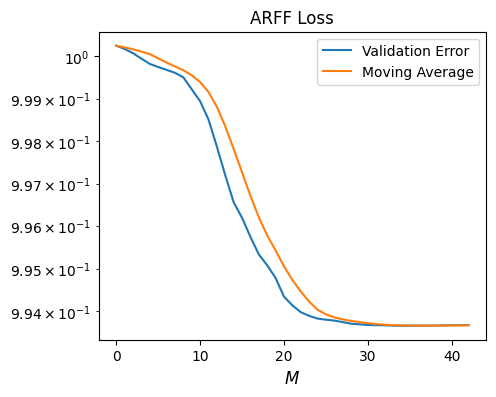

diff epoch: 10


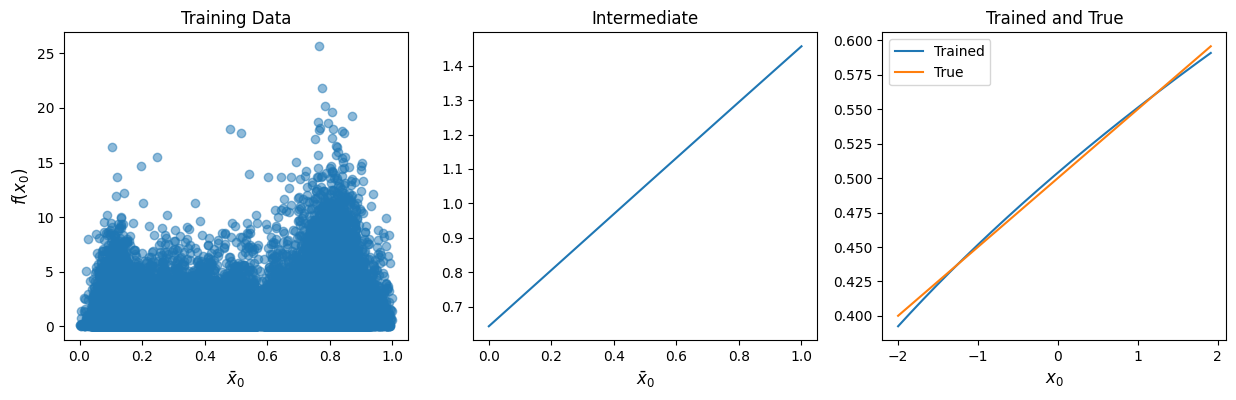

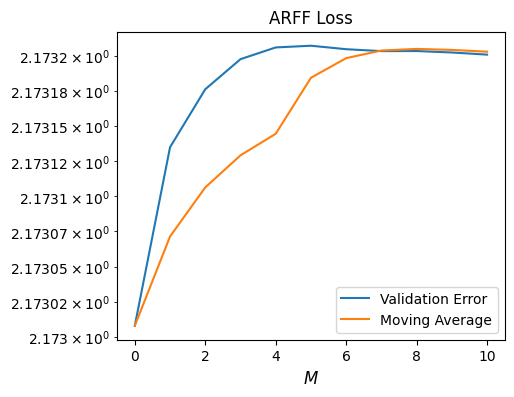

Drift RMSE: 0.16828251250132456
Diffusion RMSE: 0.0021670589860029094
Observed loss: -2.767193376558816
Observed validation loss: -2.762213226765015
True loss: -2.7451450582715378
Training time: 61.266273021698
step_size: 0.0005
# data points: 199900
drift epoch: 47


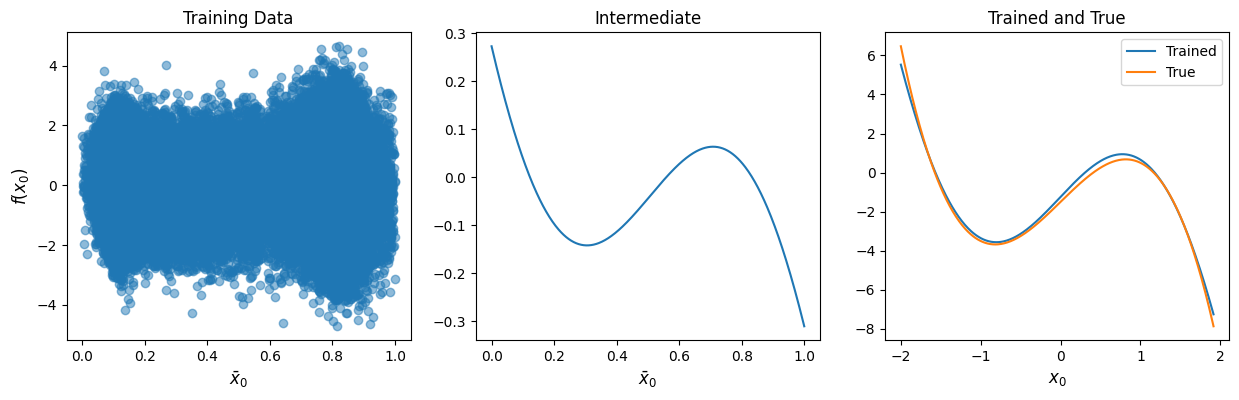

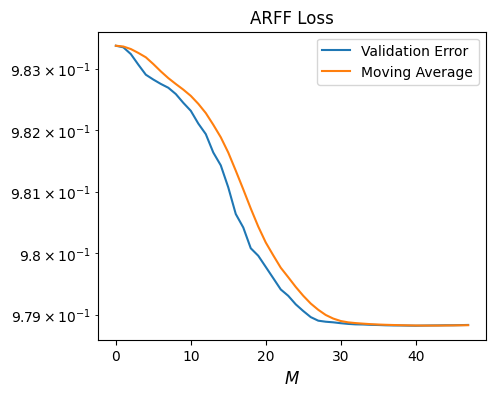

diff epoch: 20


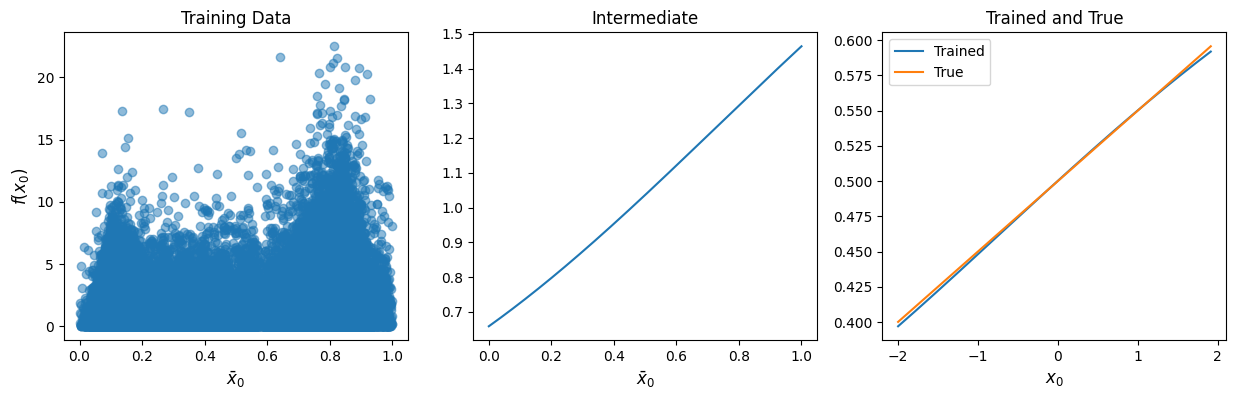

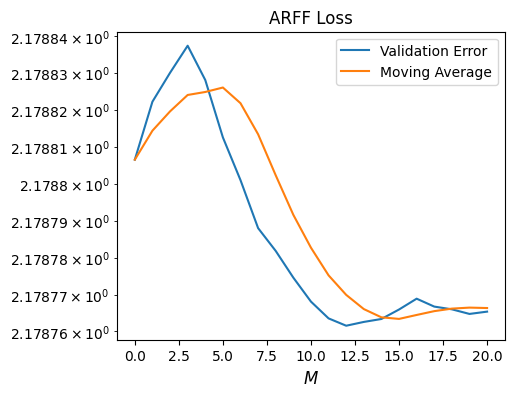

Drift RMSE: 0.1416431707037052
Diffusion RMSE: 0.0020365105572142162
Observed loss: -3.1142434521768227
Observed validation loss: -3.119743938503992
True loss: -3.102347376265644
Training time: 175.93121480941772
step_size: 0.0001
# data points: 999900
drift epoch: 74


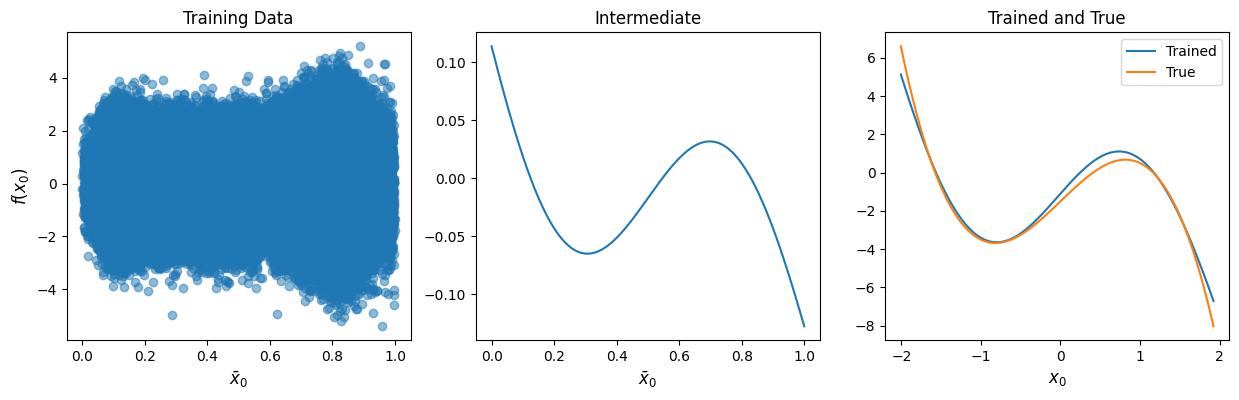

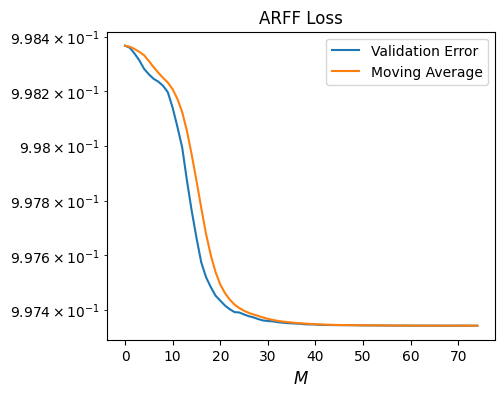

diff epoch: 16


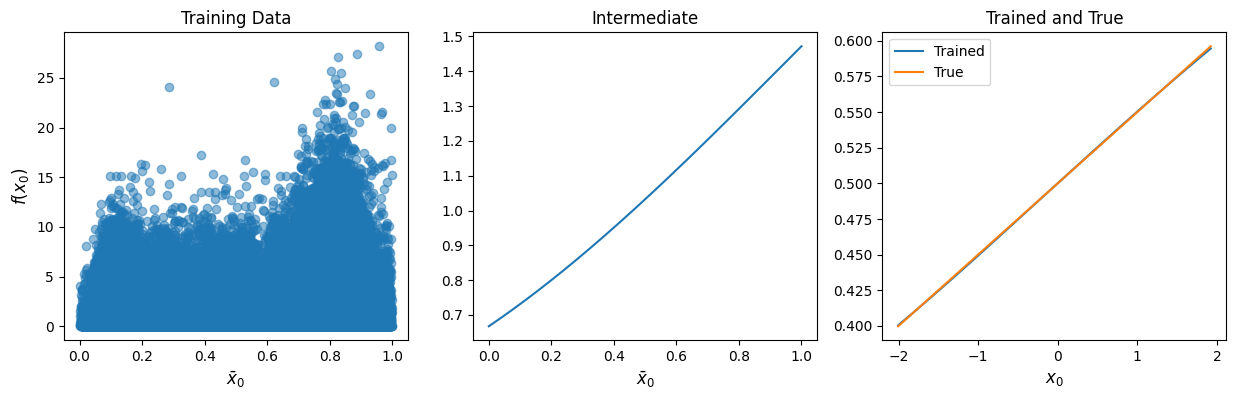

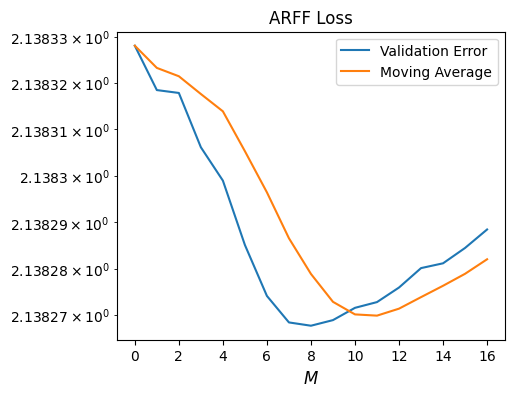

Drift RMSE: 0.19637206412915217
Diffusion RMSE: 0.0003936227019927254
Observed loss: -3.9166337728658873
Observed validation loss: -3.9186935474302436
True loss: -3.901580103835529
Training time: 1258.973049879074


In [5]:

# step_size_test = 10 ** np.linspace(-1, -4, 8)
step_size_test = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

drift_RMSE = np.zeros(len(step_size_test))
diffusion_RMSE = np.zeros(len(step_size_test))

for j, step_size in enumerate(step_size_test):
    print('step_size:', step_size)
    rng = np.random.default_rng(random_seed)
    
    sampled_trajectories = trajectories[:, :, ::int(step_size/trajectory_step_size)]
    x_data = sampled_trajectories[:, :, :-1].reshape(-1, n_dimensions)
    y_data = sampled_trajectories[:, :, 1:].reshape(-1, n_dimensions)
    print('# data points:', x_data.shape[0])
    
    step_sizes = np.zeros((x_data.shape[0], 1)) + step_size
    
    # build network
    SAT = SDEARFFTrain(n_dimensions=n_dimensions, rng=rng, resampling=True)
    
    # train network
    hist = SAT.train_model(drift_param, diff_param, true_drift, true_diffusion, x_data, y_data, step_sizes=step_sizes, validation_split=validation_split, ARFF_validation_split=ARFF_validation_split, plot=True)

    drift_RMSE[j] = hist.history["drift_RMSE"]
    diffusion_RMSE[j] = hist.history["diffusion_RMSE"]




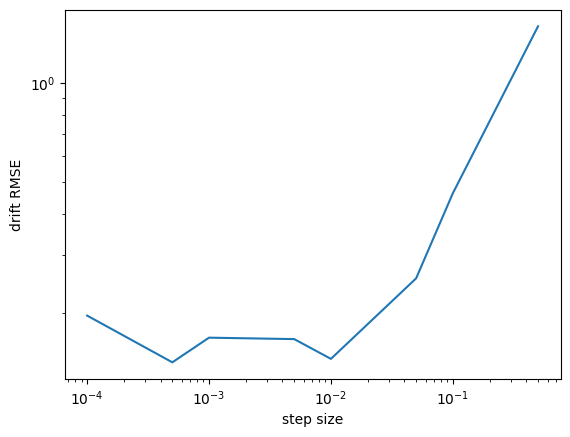

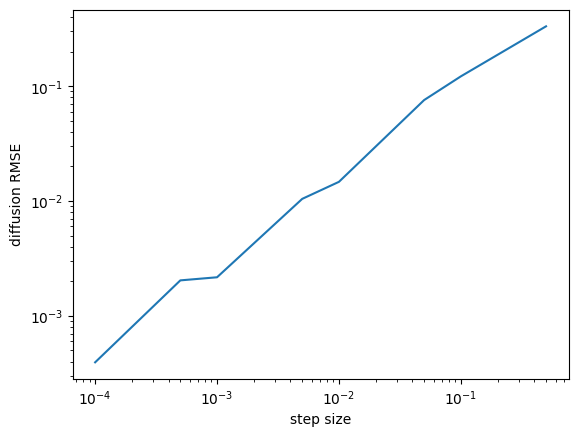

Output directory: /home/douglaoj/sde_identification_master/SDE-ARFF/saved_results/RMSE_v_step_size
Directory exists: False


<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

plt.loglog(step_size_test, drift_RMSE)
plt.xlabel('step size')
plt.ylabel('drift RMSE')
plt.show()

plt.loglog(step_size_test, diffusion_RMSE)
plt.xlabel('step size')
plt.ylabel('diffusion RMSE')
plt.show()

output_dir = os.path.join(script_dir, 'saved_results', 'RMSE_v_step_size')
print(f"Output directory: {output_dir}")
print(f"Directory exists: {os.path.exists(output_dir)}")
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f"{data_name}.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')